In [1]:

import pandas as pd
from catboost import CatBoostClassifier



cat = CatBoostClassifier()
cat_2 = CatBoostClassifier()
h1 = cat.load_model('h1_model')
se = cat_2.load_model('model_seasonal')
test = pd.read_csv('../../data/test_set_features.csv', index_col=0).astype('category')
for col in test: test[col] = test[col].cat.codes

prob_h1 = h1.predict_proba(test)[:, 1]
prob_se = se.predict_proba(test)[:, 1]

<AxesSubplot:>

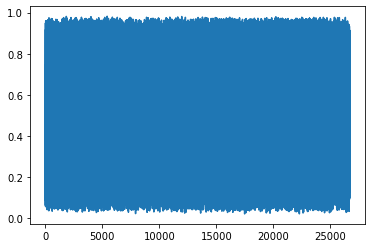

In [28]:
%matplotlib inline

pd.Series(prob_se).plot()

In [2]:
sub = pd.read_csv('../../data/submission_format.csv', index_col=0)
sub['h1n1_vaccine'] = prob_h1
sub['seasonal_vaccine'] = prob_se
sub
sub.to_csv('final.csv', index=True)

In [3]:
sub

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.146492,0.232184
26708,0.043166,0.047697
26709,0.132343,0.707141
26710,0.873078,0.930492
26711,0.262602,0.426975
...,...,...
53410,0.745242,0.647020
53411,0.071563,0.163122
53412,0.769722,0.283759


In [32]:
prob_h1

array([0.14548788, 0.0242592 , 0.13234813, ..., 0.71480708, 0.03428061,
       0.3767971 ])